In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
# deep learning
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import (
    Input,
    Conv1D,
    MaxPooling1D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
)
#from keras.optimizers import Adam


In [2]:
%time data = pd.read_csv('../data/onlinefraud.csv')

print(data.shape)

CPU times: total: 6.78 s
Wall time: 6.81 s
(6362620, 11)


In [3]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5048888,354,CASH_OUT,497085.79,C1099293347,0.00,0.00,C2013641620,499519.95,996605.74,0,0
4177915,304,CASH_IN,341363.14,C1523452308,785.00,342148.14,C1376350433,988322.41,646959.27,0,0
4849518,347,CASH_OUT,48000.02,C1627911085,0.00,0.00,C1063258147,139559.40,187559.42,0,0
3086273,235,PAYMENT,7551.88,C840344938,77292.00,69740.12,M95531219,0.00,0.00,0,0
1600299,156,CASH_IN,292197.79,C1269620272,11327.00,303524.79,C1427729426,194794.76,0.00,0,0
3644724,275,CASH_OUT,77206.68,C1377267644,314963.00,237756.32,C1097389591,365655.71,442862.39,0,0
392042,18,CASH_IN,207185.79,C592568414,5414759.62,5621945.41,C1185356766,411854.59,204668.80,0,0
3289686,252,CASH_OUT,436525.14,C421891529,0.00,0.00,C1460060625,787166.69,1223691.83,0,0
2892800,228,PAYMENT,18266.01,C2026501575,23237.00,4970.99,M1488271893,0.00,0.00,0,0
1723872,160,CASH_OUT,179921.99,C611211391,0.00,0.00,C1412626582,211794.69,391716.69,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
print(data["isFraud"].value_counts())

print(data["isFlaggedFraud"].value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


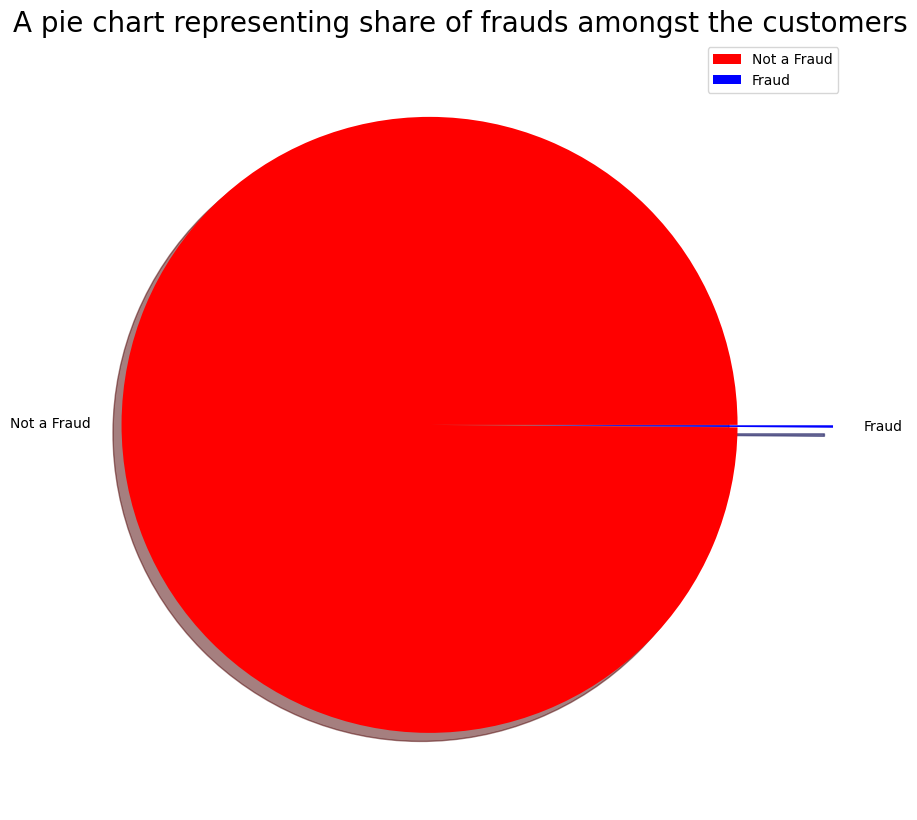

In [7]:
labels = ['Not a Fraud', 'Fraud']
colors = ['red', 'blue']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

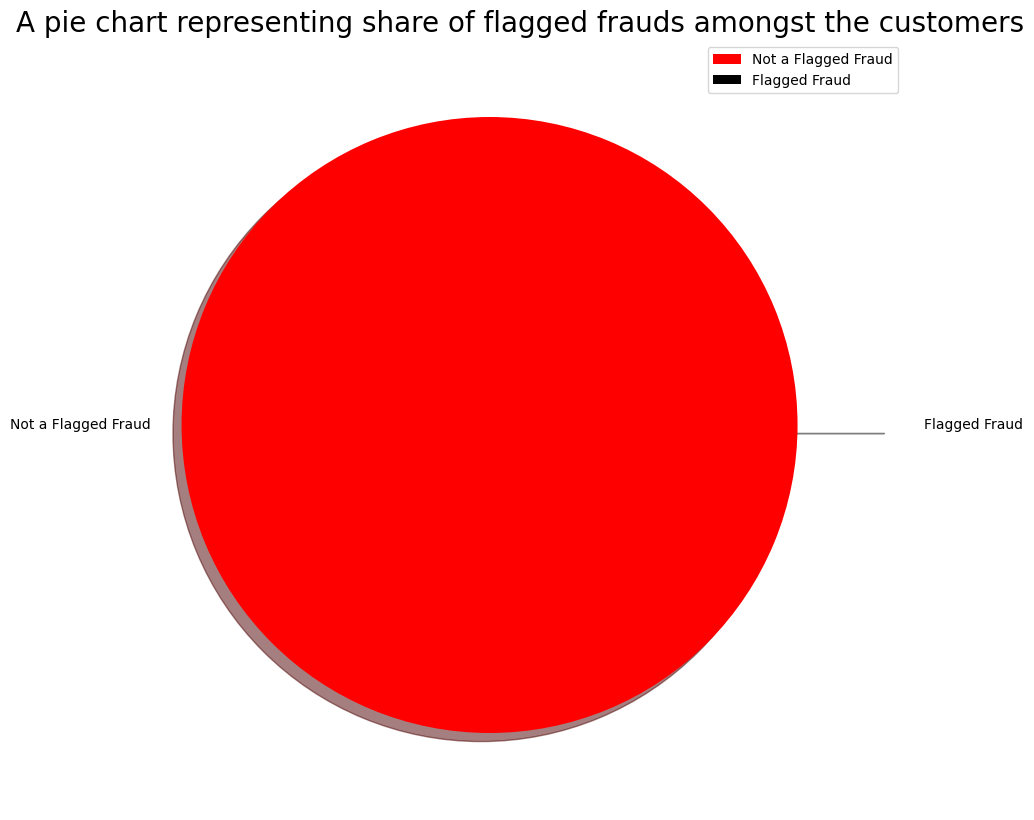

In [8]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['red', 'black']
size = [6362604, 16]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

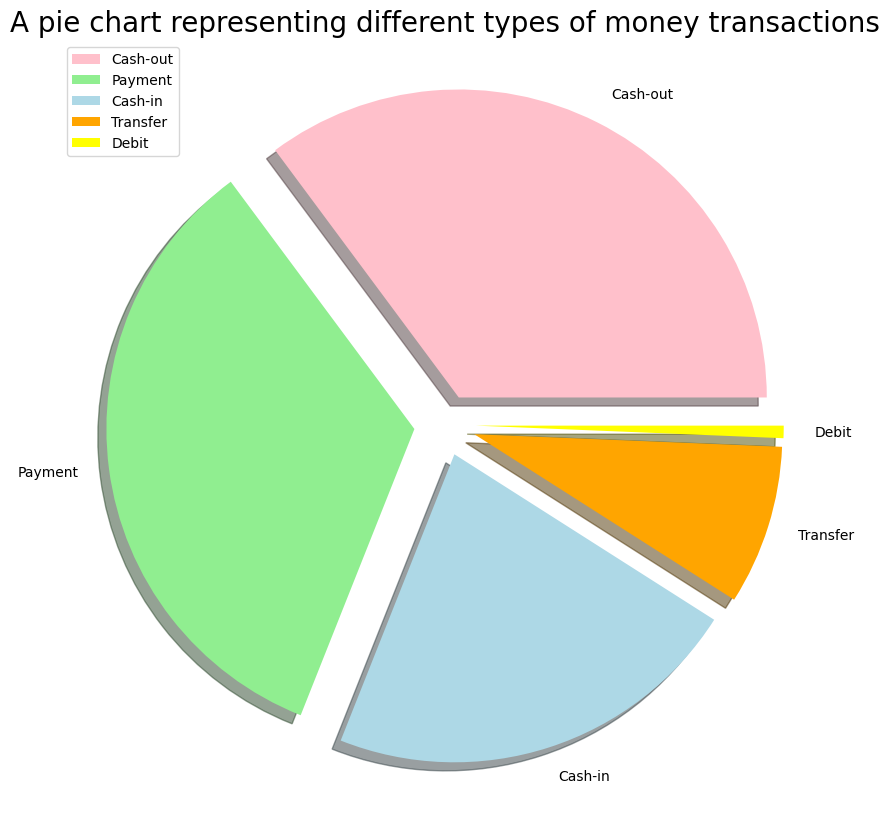

In [9]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16268\1719265913.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


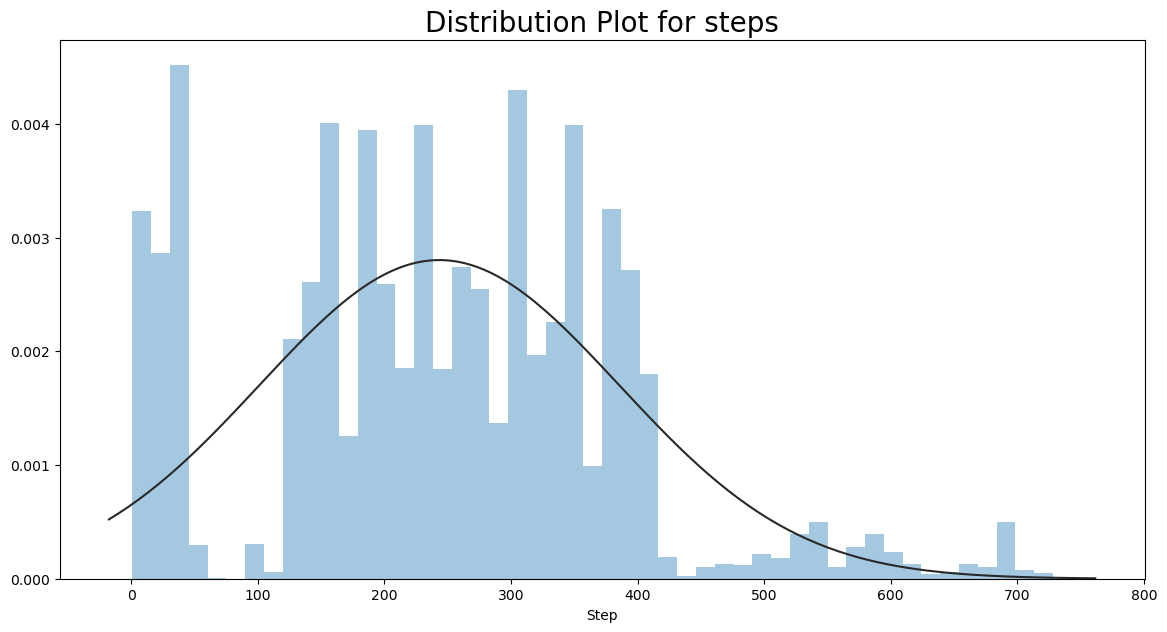

In [10]:
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

In [11]:
print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [12]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [13]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape

(2770409, 11)

In [14]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [15]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16268\3274444805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16268\3274444805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [16]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(2770409, 11)

In [17]:
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [18]:
X.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.00,0.00,0.00,1,0,0.000000e+00,181.00
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0,0.000000e+00,21363.00
15,1,1,229133.94,15325.00,0.00,5083.00,51513.44,0,0,2.138089e+05,182703.50
19,1,0,215310.30,705.00,0.00,22425.00,0.00,0,0,2.146053e+05,237735.30
24,1,0,311685.89,10835.00,0.00,6267.00,2719172.89,0,0,3.008509e+05,-2401220.00
42,1,1,110414.71,26845.41,0.00,288800.00,2415.16,0,0,8.356930e+04,396799.55
47,1,1,56953.90,1942.02,0.00,70253.00,64106.18,0,0,5.501188e+04,63100.72
48,1,1,5346.89,0.00,0.00,652637.00,6453430.91,0,0,5.346890e+03,-5795447.02
51,1,1,23261.30,20411.53,0.00,25742.00,0.00,0,0,2.849770e+03,49003.30
58,1,0,62610.80,79114.00,16503.20,517.00,8383.29,0,0,0.000000e+00,54744.51


In [19]:
X.isnull().any().any()

False

In [20]:
X['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [21]:
Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (2770409, 10)
Shape of y:  (2770409,)


In [22]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_resample(X, Y.values.ravel())

# getting the shapes of x and y after resampling
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (5524392, 10)
Shape of y: (5524392,)


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (4419513, 10)
Shape of x_test:  (1104879, 10)
Shape of y_train:  (4419513,)
Shape of y_test:  (1104879,)


In [24]:
x_val,x_tst,y_val,y_tst=train_test_split(x_test,y_test,test_size=0.3,random_state=0)
print("Shape of x_val: ", x_val.shape)
print("Shape of x_test: ", x_tst.shape)
print("Shape of y_val: ", y_val.shape)
print("Shape of y_test: ", y_tst.shape)

Shape of x_val:  (773415, 10)
Shape of x_test:  (331464, 10)
Shape of y_val:  (773415,)
Shape of y_test:  (331464,)


In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_tst=sc.transform(x_tst)
x_train.shape

(4419513, 10)

In [26]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
x_tst = x_tst.reshape(x_tst.shape[0], x_tst.shape[1], 1)

# verifying the changed shape
x_train.shape, x_val.shape,x_tst.shape

((4419513, 10, 1), (773415, 10, 1), (331464, 10, 1))

In [27]:
model = Sequential()

model.add(
    Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=x_train[0].shape)
)
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv1D(filters=128, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=256, kernel_size=3, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             256       
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 64)             256       
_________________________________________________________________
dropout (Dropout)            (None, 8, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 128)            24704     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 128)            512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4, 256)            9

In [28]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC()],
)

# fitting the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=2)

Epoch 1/2
138110/138110 [==============================] - 1496s 11ms/step - loss: 0.0512 - accuracy: 0.9834 - auc: 0.9974 - val_loss: 0.1909 - val_accuracy: 0.9483 - val_auc: 0.9889
Epoch 2/2
138110/138110 [==============================] - 1505s 11ms/step - loss: 0.0376 - accuracy: 0.9888 - auc: 0.9983 - val_loss: 0.3117 - val_accuracy: 0.9293 - val_auc: 0.9765


In [29]:
print("Average AUC Score: ", np.mean(history.history["val_auc"]))

Average AUC Score:  0.9827181696891785


In [30]:
y_pred=model.predict(x_tst)

accuracy of the model:  0.9291597277532402


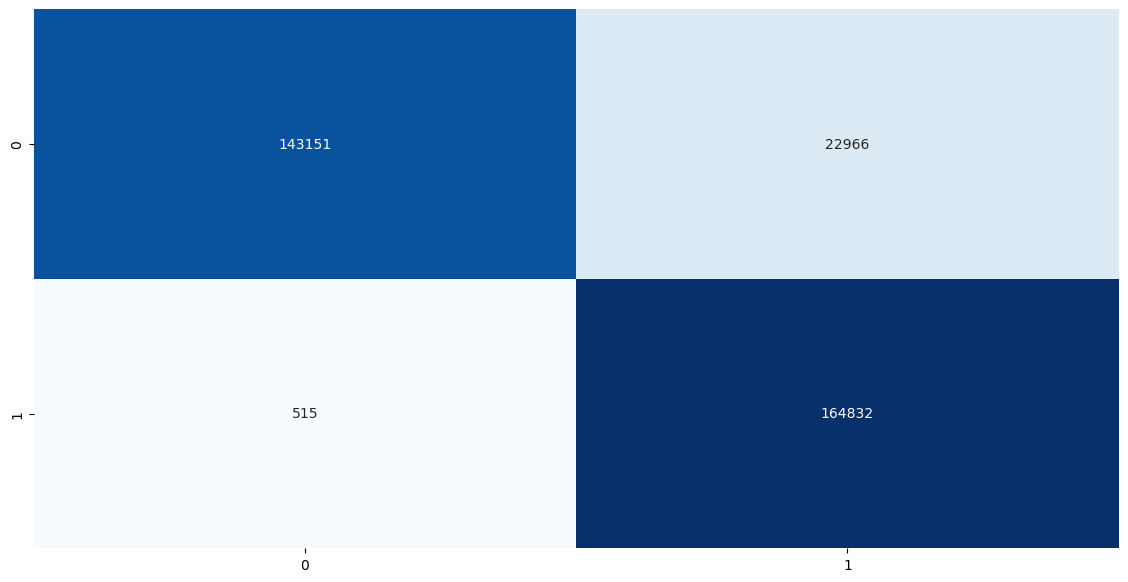

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tst, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_tst, y_pred.round())
print('accuracy of the model: ',ac)

Text(0.5, 1.0, 'Loss Curves')

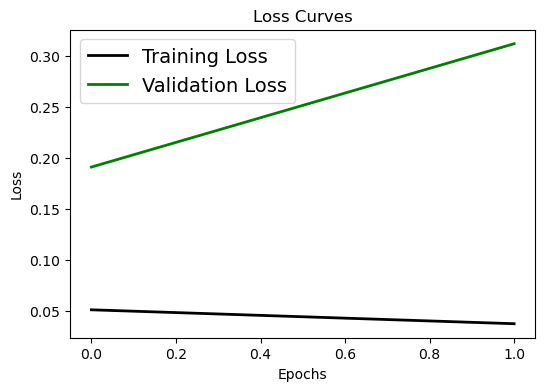

In [33]:
plt.figure(figsize=[6, 4])
plt.plot(history.history["loss"], "black", linewidth=2.0)
plt.plot(history.history["val_loss"], "green", linewidth=2.0)
plt.legend(["Training Loss", "Validation Loss"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves", fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

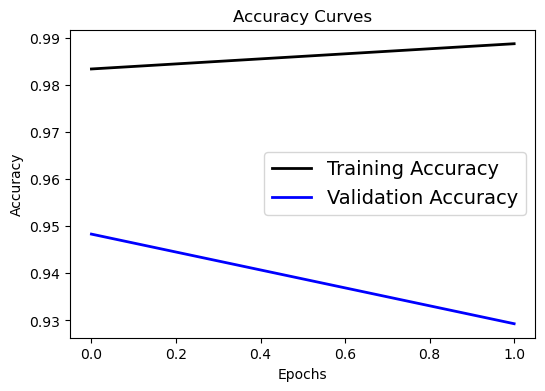

In [34]:
plt.figure(figsize=[6, 4])
plt.plot(history.history["accuracy"], "black", linewidth=2.0)
plt.plot(history.history["val_accuracy"], "blue", linewidth=2.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=14)
plt.xlabel("Epochs", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy Curves", fontsize=12)